In [1]:
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
assets = ['AAPL', 'CSCO', 'IBM', 'MSFT', 'CRM']

In [3]:
weights = np.array([0.2,0.2,0.2,0.2,0.2])

In [4]:
stockStartDate = '2013-01-01'

In [5]:
today = datetime.today().strftime('%Y-%m-%d')
today

'2022-02-01'

In [6]:
df = pd.DataFrame()
for stock in assets:
    df[stock] = web.DataReader(stock, data_source = 'yahoo', start = stockStartDate, end = today)['Adj Close']

In [7]:
 df

,AAPL,CSCO,IBM,MSFT,CRM
Date,,,,,
2013-01-02,16.960693,15.380287,133.331985,22.988085,42.792500
2013-01-03,16.746614,15.463465,132.598557,22.680140,42.177502
2013-01-04,16.280140,15.486156,131.729431,22.255663,42.402500
2013-01-07,16.184376,15.342477,131.152206,22.214045,42.244999
2013-01-08,16.227936,15.357604,130.968826,22.097525,42.492500
...,...,...,...,...,...
2022-01-26,159.690002,55.330002,134.259995,296.709991,211.000000
2022-01-27,159.220001,54.619999,132.520004,299.839996,212.740005
2022-01-28,170.330002,55.610001,134.500000,308.260010,222.130005


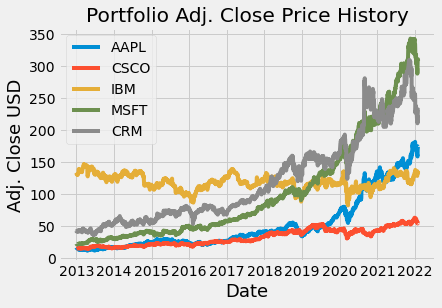

In [8]:
title = 'Portfolio Adj. Close Price History'
my_stocks = df

for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label = c)

plt.title(title)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adj. Close USD', fontsize = 18)
plt.legend(my_stocks.columns.values, loc= 'upper left')
plt.show()

In [9]:
returns = df.pct_change()
returns

,AAPL,CSCO,IBM,MSFT,CRM
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.012622,0.005408,-0.005501,-0.013396,-0.014372
2013-01-04,-0.027855,0.001467,-0.006555,-0.018716,0.005335
2013-01-07,-0.005882,-0.009278,-0.004382,-0.001870,-0.003714
2013-01-08,0.002691,0.000986,-0.001398,-0.005245,0.005859
...,...,...,...,...,...
2022-01-26,-0.000563,-0.013901,-0.013520,0.028493,-0.020382
2022-01-27,-0.002943,-0.012832,-0.012960,0.010549,0.008246
2022-01-28,0.069778,0.018125,0.014941,0.028082,0.044138


In [10]:
#annualized covariance matrix
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,AAPL,CSCO,IBM,MSFT,CRM
AAPL,0.079934,0.034021,0.025215,0.043440,0.041267
CSCO,0.034021,0.061763,0.031081,0.036590,0.037100
IBM,0.025215,0.031081,0.055053,0.027599,0.026410
MSFT,0.043440,0.036590,0.027599,0.067522,0.048262
CRM,0.041267,0.037100,0.026410,0.048262,0.111107


In [11]:
#calculate the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights) )
port_variance

0.04309406247162961

In [12]:
#calculate the portfolio volatility(std dev)
port_volatality = np.sqrt(port_variance)
port_volatality

0.2075910943938338

In [13]:
#calculate annual portfolio returns
portfolioSimpleAnnualReturn = np.sum(returns.mean() * weights) * 252
portfolioSimpleAnnualReturn

0.21208196868878124

In [14]:
#show the expected annual return, volatility(risk), variance
percent_var  = str(round(port_variance, 2) * 100) + '%'
percent_vols  = str(round(port_volatality, 2) * 100) + '%'
percent_ret  = str(round(portfolioSimpleAnnualReturn, 2) * 100) + '%'

print('Expected Annual Return:' + percent_ret)
print('Annual Volatility/Risk:' + percent_vols)
print('Annual Variance:' + percent_var)

Expected Annual Return:21.0%
Annual Volatility/Risk:21.0%
Annual Variance:4.0%


In [15]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [16]:
#Portfolio Optimization

#calculate the expected returns and annualized sample covariance matrix of asset returns

mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

#optimize for max sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)

OrderedDict([('AAPL', 0.27334), ('CSCO', 0.0), ('IBM', 0.0), ('MSFT', 0.72666), ('CRM', 0.0)])
Expected annual return: 32.1%
Annual volatility: 24.3%
Sharpe Ratio: 1.24


(0.3208804557680712, 0.24265787063532748, 1.239936932522754)

In [19]:
#Discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 1000000)

allocation, leftover = da.lp_portfolio()
print('Discrete Allocation:', allocation)
print('Funds Remaining : ${:2f}'.format(leftover))

Long-step dual simplex will be used
Discrete Allocation: {'AAPL': 1566, 'MSFT': 2353}
Funds Remaining : $48.436066
